## Exploratory Data Analysis (EDA) for Credit Default

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

- X2: Gender (1 = male; 2 = female).

- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

- X4: Marital status (1 = married; 2 = single; 3 = others).

- X5: Age (year).

- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; 
    - X11 = the repayment status in April, 2005. 
    
    The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005; 
    - X13 = amount of bill statement in August, 2005; 
    - X17 = amount of bill statement in April, 2005. 

- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005;
    - X23 = amount paid in April, 2005.





###### Datasource 
###### - Yeh, I. (2009). Default of Credit Card Clients [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C55S3H.

## Basic Dataset Information

In [9]:
# Import libraries. 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Filter out warnings
warnings.filterwarnings('ignore')

# Load dataset. 
df = pd.read_excel("../data/raw/default_credit.xls", header=1)
# show dataframe 
# friendly reminder: default payment next month = Y and ID is the customer ID, and 
# other columns use for X1, X2, ..., X3, Xn. 
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [10]:
# Get dataset dimensions
# df.shape
# Get column names and data types
df.info()
# Get column names only
#df.columns
# Check for missing values
#df.isnull().sum()
# Get unique values in each column
# df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

## Convert Data Types for Different Variables

In [11]:
# Convert categorical variables to proper categories
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Or convert to specific categories with meaningful labels
# df['SEX'] = df['SEX'].map({1: 'Male', 2: 'Female'}).astype('category')
# df['EDUCATION'] = df['EDUCATION'].map({1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others'}).astype('category')
# df['MARRIAGE'] = df['MARRIAGE'].map({1: 'Married', 2: 'Single', 3: 'Others'}).astype('category')

# Convert numerical variables to proper numeric types
numerical_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                  'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for col in numerical_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert ID column
df['ID'] = df['ID'].astype('object')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          30000 non-null  object  
 1   LIMIT_BAL                   30000 non-null  int64   
 2   SEX                         30000 non-null  category
 3   EDUCATION                   30000 non-null  category
 4   MARRIAGE                    30000 non-null  category
 5   AGE                         30000 non-null  int64   
 6   PAY_0                       30000 non-null  category
 7   PAY_2                       30000 non-null  category
 8   PAY_3                       30000 non-null  category
 9   PAY_4                       30000 non-null  category
 10  PAY_5                       30000 non-null  category
 11  PAY_6                       30000 non-null  category
 12  BILL_AMT1                   30000 non-null  int64   
 13  BILL_AMT2       

## Statistical Analysis

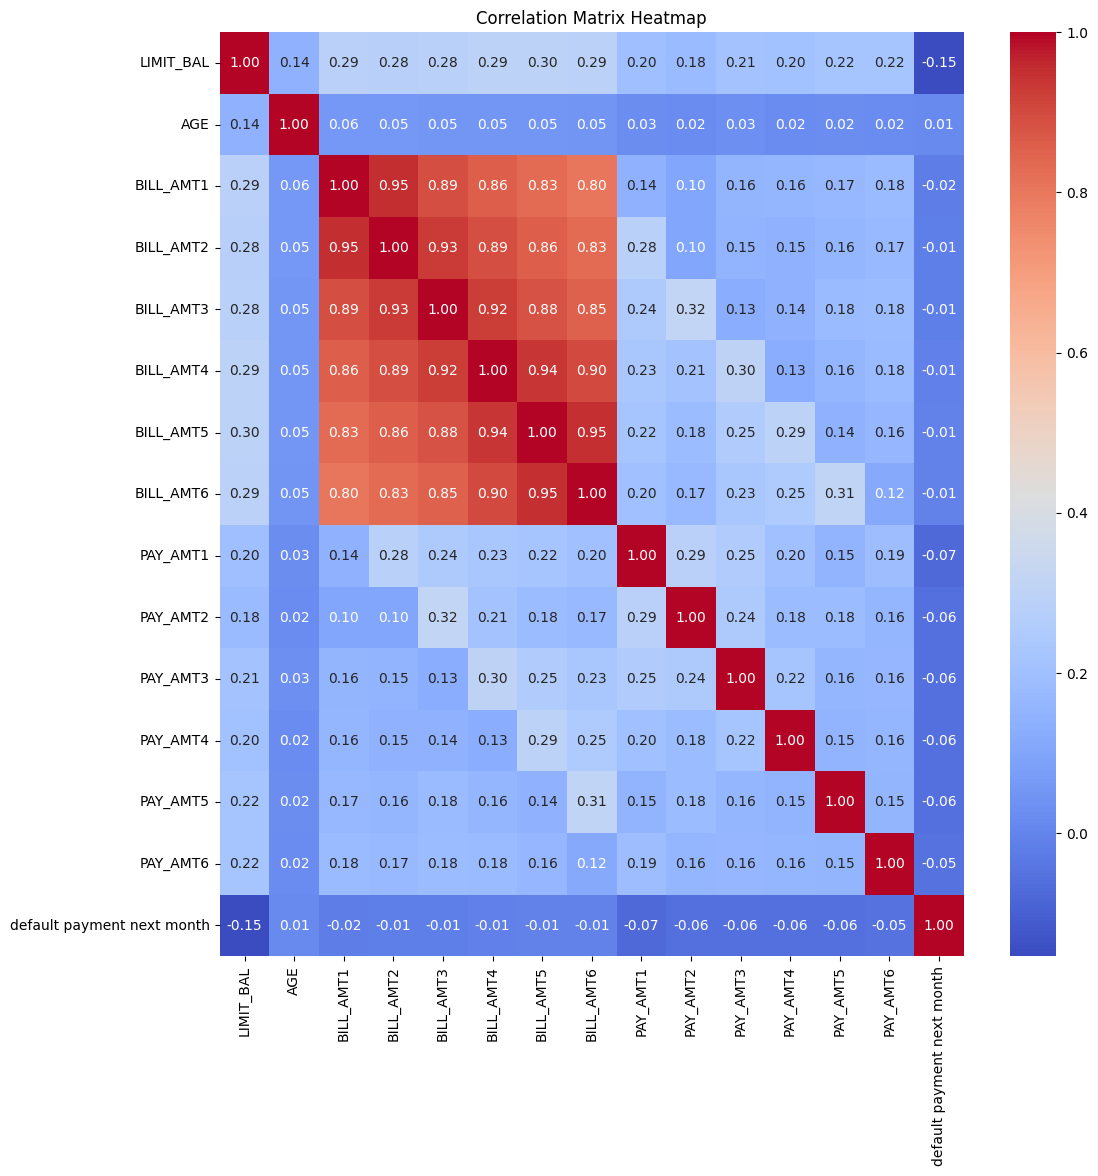

In [12]:
# Get count, mean, std, min, max, and 25%, 50%, 75% quantiles for numerical variables
df.describe(exclude='category', include='int64')  
# Get count, mean, std, min, max, and 25%, 50%, 75% quantiles for categorical variables
# df.describe(exclude='int64', include='category')  

# Correlation matrix (for numerical variables)
correlation_matrix = df.corr(numeric_only=True) 

plt.figure(figsize=(12, 12)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Insights: Payments are correlated 